<a href="https://colab.research.google.com/github/CoopaM/Star-Project/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Imports

import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CoopaM/Star-Project/Rew/hipparcos-voidmain.csv')

df.head(5)


,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


####**Dropping the nulls in our target variable and make a copy of the dataset so that we have an unchanged base to refer to.**

In [ ]:


df=df.dropna(subset = ['HvarType'])

df_2 = df.copy()

####**Creating only 2 values for the target column to later be label encoded with 1's and 0's**

In [44]:
df_2.loc[df_2['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'


df_2['HvarType'].unique()

array(['C', 'S'], dtype=object)

####**Data cleaning to handel nulls in the categorical columns, some become numerical columns and some are still categorical.**

In [5]:
df_2['AstroRef'] = df_2['AstroRef'].replace((dict.fromkeys(['A', 'B', 'C', 'G', 'E', 'D', 'S'], 1 )))

df_2['AstroRef'] = df_2['AstroRef'].replace((dict.fromkeys(['+', '*'], 2 )))

df_2['AstroRef'].fillna(value=0, inplace=True)

df_2['AstroRef'].unique()

array([2., 0., 1.])

In [6]:
df_2['m_BTmag'].fillna(value=0, inplace=True)

df_2['m_BTmag'] = df_2['m_BTmag'].replace((dict.fromkeys(['A', 'B', 'C', 'E', 'D', 'S'], 1 )))

df_2['m_BTmag'] = df_2['m_BTmag'].replace((dict.fromkeys(['*', '-'], 2 )))

df_2['m_BTmag'].unique()

array([0, 2, 1])

In [7]:
df_2['r_B-V'].fillna(value='None', inplace=True)

df_2['r_B-V'].unique()

array(['G', 'T', 'None'], dtype=object)

In [8]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['A'], 1 )))

df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], 2 )))

df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['O', 'L', 'M', 'N', 'P'], 3 )))

df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['Q'], 4 )))

df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['R', 'T','S'], 5 )))

df_2['r_V-I'].unique()

array([2, 3, 1, 5, 4])

In [9]:
df_2['m_Hpmag'] = df_2['m_Hpmag'].replace((dict.fromkeys(['B', 'A', 'C', 'D', 'S', 'E'], 1 )))

df_2['m_Hpmag'] = df_2['m_Hpmag'].replace((dict.fromkeys(['*', '-'], 2 )))

df_2['m_Hpmag'].fillna(value=0, inplace=True)

df_2['m_Hpmag'].unique()

array([0., 2., 1.])

In [10]:
df_2['n_CCDM'] = df_2['n_CCDM'].replace((dict.fromkeys(['I', 'H', 'M'], 1 )))

df_2['n_CCDM'].fillna(value=0, inplace=True)

df_2['n_CCDM'].unique()

array([0., 1.])

In [11]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['C'], 1 )))

df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['G'], 2 )))

df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['O'], 3 )))

df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['V'], 4 )))

df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['X'], 5 )))

df_2['MultFlag'].fillna(value=0, inplace=True)

df_2['MultFlag'].unique()

array([3., 0., 1., 2., 5., 4.])

In [12]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['I'], 1 )))

df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['P'], 2 )))

df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['S'], 3 )))

df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['L'], 4 )))

df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['F'], 5 )))

df_2['Source'].fillna(value=0, inplace=True)

df_2['Source'].unique()

array([0., 1., 2., 3., 4., 5.])

In [13]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['A'], 'GOOD'  )))

df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['B'], 'FAIR' )))

df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['C'], 'POOR' )))

df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['D'], 'UNCERTAIN' )))

df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['S'], 'UNKNOWN' )))

df_2['Qual'].fillna(value='None', inplace=True)

df_2['Qual'].unique()

array(['None', 'UNKNOWN', 'GOOD', 'FAIR', 'UNCERTAIN', 'POOR'],
      dtype=object)

In [14]:


df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['W'], 'D+P' )))

df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['X'], 'D+G' )))

df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['Y'], 'G+P' )))

df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['Z'], 'D+G' )))

df_2['Notes'].fillna(value='NONE', inplace=True)

df_2['Notes'].unique()

array(['NONE', 'P', 'D', 'G', 'D+P', 'G+P', 'D+G'], dtype=object)

In [15]:

df_2['r_SpType'].fillna(value='NONE', inplace=True)

df_2['r_SpType'] = df_2['r_SpType'].replace((dict.fromkeys(['1','2','3','4'], 'M' )))

df_2['r_SpType'].unique()


array(['M', 'S', 'G', 'X', 'NONE', 'K'], dtype=object)

####**Creating varibles of the numerical and catergorical columns to be refered to later**

In [16]:
catCols = [
 'r_Vmag',
 'r_B-V',
 'Qual',
 'Notes',
 'r_SpType']

numCols = [col for col in df_2.columns if df_2[col].dtype in ['int64', 'float64']]

used_cols = numCols + catCols

In [67]:
numCols

['HIP',
 'Vmag',
 'VarFlag',
 'RAdeg',
 'DEdeg',
 'AstroRef',
 'Plx',
 'pmRA',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'DE:RA',
 'Plx:RA',
 'Plx:DE',
 'pmRA:RA',
 'pmRA:DE',
 'pmRA:Plx',
 'pmDE:RA',
 'pmDE:DE',
 'pmDE:Plx',
 'pmDE:pmRA',
 'F1',
 'F2',
 '---',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'e_VTmag',
 'm_BTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'r_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'm_Hpmag',
 'Hpmax',
 'HPmin',
 'Period',
 'moreVar',
 'n_CCDM',
 'Nsys',
 'Ncomp',
 'MultFlag',
 'Source',
 'theta',
 'rho',
 'e_rho',
 'dHp',
 'e_dHp',
 'HD',
 '(V-I)red']

####**Creating our X and Y variables for our train test split and the label encoding the target (y) to be: S -> 1's and C -> 0's**

In [ ]:
X = df_2[used_cols]
y = df_2['HvarType']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [21]:
lE = LabelEncoder()
lE.fit(y)
y_train = lE.transform(y_train)
y_test = lE.transform(y_test)

####**Transforms catergorical columns to fill nulls with the most frequent value for its respective column and to be OneHotEncoded, also the numerical columns to have nulls filled with the median value for its respective column and to be scaled**

In [22]:
cat_transformer = Pipeline(steps = [
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
        ('num_imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num_transformer', num_transformer, numCols),
    ('cat_transformer', cat_transformer, catCols)
])

In [ ]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=5000))
])

lr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HIP', 'Vmag', 'VarFlag',
                                                   'RAdeg', 'DEdeg', 'AstroRef',
                                                   'Plx', 'pmRA', 'pmDE',
                                                   'e_RAdeg', 'e_DEdeg',
                                                   'e_Plx', 'e_pmRA', 'e_pmDE',
                                                   'DE:RA', 'Plx:RA', 'Plx:DE',
                                                   'pmRA:RA', 'pmRA:DE',
           

In [51]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_probas):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_probas):.4f}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Train F1: 0.9108
Train Precision: 0.9666
Train ROC-AUC: 0.9500
********************
Test F1: 0.9123
Test Precision: 0.9639
Test ROC-AUC: 0.9517


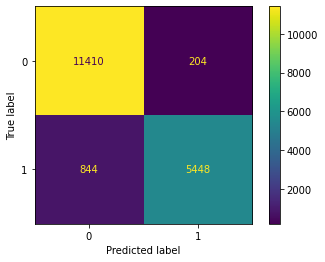

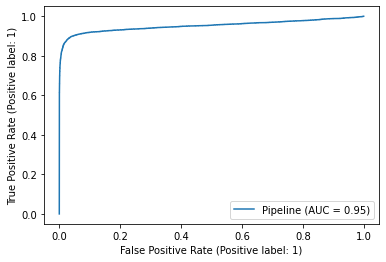

In [53]:
evaluate(lr, x_train, x_test, y_train, y_test);

####**We chose to use a tree model because we believe there is interaction between the features and this model will automatically take care of that for us. We ran a grid search to try to get the best parameters to see what would make our model the best it could be**


In [30]:
param_grid = {
    'tree__max_depth': [30, 40, 50],
    'tree__min_samples_leaf': [30, 40, 50],
    'tree__min_samples_split': [30, 40, 50],
    'tree__max_features': ['auto', 'sqrt', 'log2']
}

In [32]:
gs = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')

gs.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(x_test, y_test)

In [ ]:
gs.cv_results_

In [58]:
dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth= 22, min_samples_leaf= 50, random_state=42 ))
])

In [59]:
dt.fit(x_train, y_train)
dt.predict(x_test) 

array([1, 0, 0, ..., 0, 1, 0])

In [60]:
dt.score(x_test, y_test)

0.9385680777393053

In [61]:
print(f'Train Accuracy: {dt.score(x_train, y_train)}')
print(f'Test Accuracy: {dt.score(x_test, y_test)}')

Train Accuracy: 0.9449512249609056
Test Accuracy: 0.9385680777393053


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


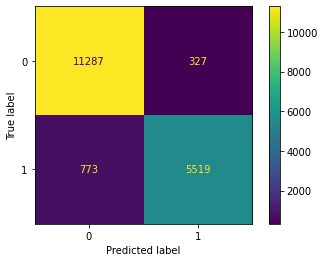

In [29]:
plot_confusion_matrix(dt, x_test, y_test)

####**The decision tree model seems to slightly overfit so we decided to move forward using a Random Forrest model with the same parameters from the decision tree.**

In [45]:
rfc = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(random_state=42, max_depth=22, min_samples_leaf=50))
])

rfc.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HIP', 'Vmag', 'VarFlag',
                                                   'RAdeg', 'DEdeg', 'AstroRef',
                                                   'Plx', 'pmRA', 'pmDE',
                                                   'e_RAdeg', 'e_DEdeg',
                                                   'e_Plx', 'e_pmRA', 'e_pmDE',
                                                   'DE:RA', 'Plx:RA', 'Plx:DE',
                                                   'pmRA:RA', 'pmRA:DE',
           

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


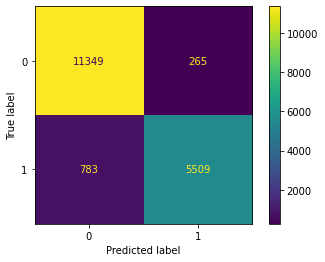

In [68]:
plot_confusion_matrix(rfc, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


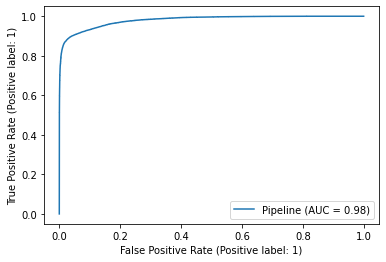

In [55]:
plot_roc_curve(rfc, x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


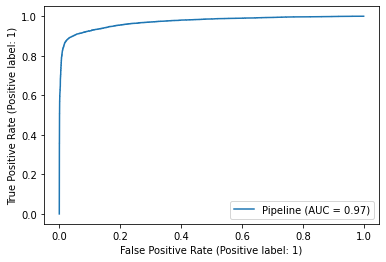

In [54]:
plot_roc_curve(rfc, x_test, y_test);

In [48]:
print(f'Train Accuracy: {rfc.scobre(x_train, y_train)}')
print(f'Test Accuracy: {rfc.score(x_test, y_test)}')

Train Accuracy: 0.9423821580162335
Test Accuracy: 0.9414721322461744


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Train F1: 0.9136
Train Precision: 0.9602
Train ROC-AUC: 0.9801
********************
Test F1: 0.9131
Test Precision: 0.9541
Test ROC-AUC: 0.9718


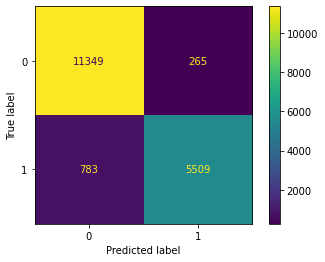

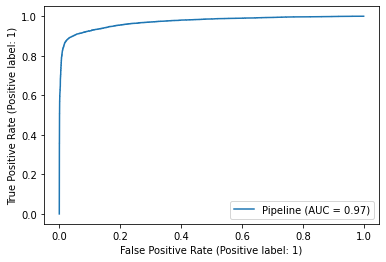

In [56]:
evaluate(rfc, x_train, x_test, y_train, y_test);